### 참고링크
청각장애 발음 예시 https://www.youtube.com/watch?v=oqghQ0EpH78


음성 데이터 https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&dataSetSn=608

자음 분석 pdf https://jslhd.org/xml/20731/20731.pdf


In [31]:

pip install torch torchvision torchaudio

  Using cached torchaudio-0.13.1-cp37-cp37m-win_amd64.whl.metadata (1.2 kB)
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
  Using cached torch-1.13.1-cp37-cp37m-win_amd64.whl.metadata (23 kB)
   ---------------------------------------- 1.1/1.1 MB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 162.6/162.6 MB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 2.0/2.0 MB 4.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.5.0
    Uninstalling torch-1.5.0:
      Successfully uninstalled torch-1.5.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.6.0
    Uninstalling torchvision-0.6.0:
      Successfully uninstalled torchvision-0.6.0
No

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [30]:
import speech_recognition as sr

# Create a recognizer instance
recognizer = sr.Recognizer()

# Function to recognize and parse speech
def recognize_and_parse():
    with sr.Microphone() as source:
        print("Listening...")
        while True:
            try:
                # Adjust for ambient noise and listen for audio
                recognizer.adjust_for_ambient_noise(source)
                audio = recognizer.listen(source)

                # Recognize speech using Google Web Speech API
                text = recognizer.recognize_google(audio, language='ko-KR')  # Set language to Korean
                print(f"Recognized: {text}")

                # Here you can add your parsing logic
                parse_text(text)

            except sr.UnknownValueError:
                print("Sorry, I could not understand the audio.")
            except sr.RequestError as e:
                print(f"Could not request results from Google Speech Recognition service; {e}")
            except KeyboardInterrupt:
                print("Exiting...")
                break

# Function to parse recognized text
def parse_text(text):
    # Example parsing logic
    # Here, you can implement your custom logic to handle the recognized text
    print(f"Parsing text: {text}")
    # For demonstration, we just print it

if __name__ == "__main__":
    recognize_and_parse()


ModuleNotFoundError: No module named 'speech_recognition'

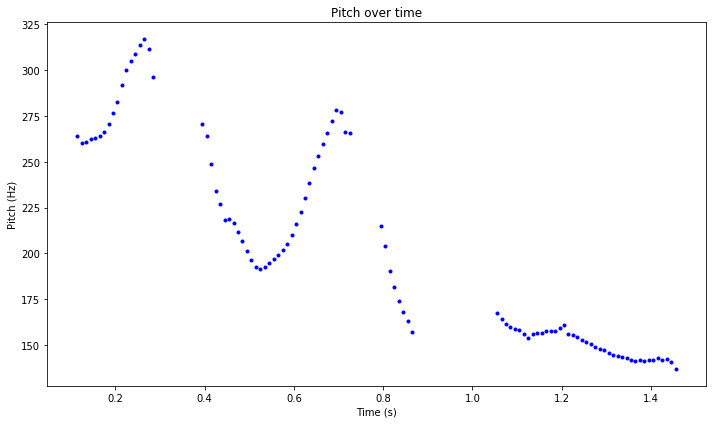

In [27]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
from gtts import gTTS
from pydub import AudioSegment
import os
import io

text = "Play some music for me."
tts = gTTS(text=text, lang='en')
tts.save("audio.mp3")


# 음성 파일 로드
snd = parselmouth.Sound("audio.mp3")

# 피치 추출
pitch = snd.to_pitch()
pitch_values = pitch.selected_array['frequency']  # Hz 단위 피치 값
pitch_values[pitch_values == 0] = np.nan  # 무성구간을 NaN으로 표시하여 그래프에서 제외
time_pitch = pitch.xs()  # 피치의 시간 값

# 피치 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(time_pitch, pitch_values, 'o', markersize=3, color='b')
plt.xlabel("Time (s)")
plt.ylabel("Pitch (Hz)")
plt.title("Pitch over time")
plt.tight_layout()

# 그래프 출력
plt.show()

In [12]:
tts

In [9]:
pip install pydub


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
from TTS.api import TTS
tts = TTS(model_name="tts_models/en/ljspeech/tacotron2-DDC", progress_bar=False)
tts.tts_to_file(text="Hello, how are you?", file_path="output.wav")


Plot saved as pitch_plot_parselmouth.png


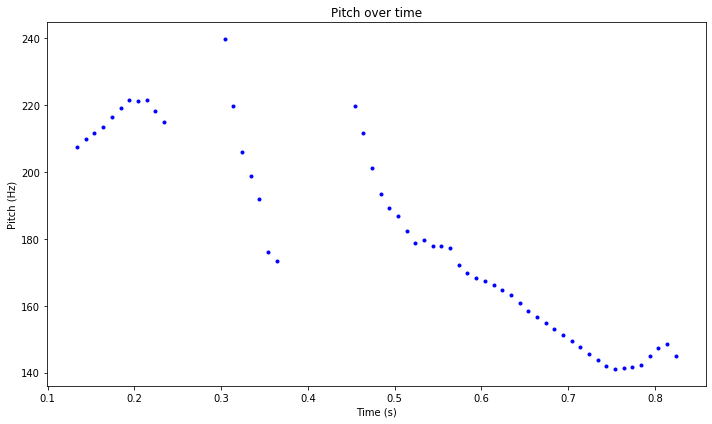

In [21]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt

# 음성 파일 경로 설정
file_path = "entrepreneur.mp3"

# 음성 파일 로드
snd = parselmouth.Sound(file_path)

# 피치 추출
pitch = snd.to_pitch()
pitch_values = pitch.selected_array['frequency']  # Hz 단위 피치 값
pitch_values[pitch_values == 0] = np.nan  # 무성구간을 NaN으로 표시하여 그래프에서 제외
time_pitch = pitch.xs()  # 피치의 시간 값

# 피치 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(time_pitch, pitch_values, 'o', markersize=3, color='b')
plt.xlabel("Time (s)")
plt.ylabel("Pitch (Hz)")
plt.title("Pitch over time")
plt.tight_layout()

# 그래프를 이미지로 저장
output_image_path = "pitch_plot_parselmouth.png"
plt.savefig(output_image_path)
print(f"Plot saved as {output_image_path}")

# 그래프 출력
plt.show()


In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# 음성 파일 로드
file_path = "hello_ai.mp3"
y, sr = librosa.load(file_path)

# 피치 추출
pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)

# 피치 데이터 정리 (최대 에너지인 주파수만 선택)
pitch_values = []
times = []

for t in range(pitches.shape[1]):
    index = magnitudes[:, t].argmax()  # 해당 프레임의 가장 큰 magnitude의 index
    pitch = pitches[index, t]
    if pitch > 0:  # 피치 값이 0보다 큰 경우만 저장
        pitch_values.append(pitch)
        times.append(t * (1.0 / sr))

# 피치 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(times, pitch_values, 'o', markersize=3, color='b')
plt.xlabel("Time (s)")
plt.ylabel("Pitch (Hz)")
plt.title("Pitch over time")
plt.tight_layout()

# 그래프를 이미지로 저장
output_image_path = "pitch_plot.png"
plt.savefig(output_image_path)
print(f"Plot saved as {output_image_path}")

# 그래프 출력
plt.show()


In [ ]:
time_intensity
intensity_values

In [ ]:
import parselmouth
from parselmouth.praat import call
import matplotlib.pyplot as plt

# 음성 파일 로드
sound = parselmouth.Sound("hello_ai.mp3")  # 파일 경로 설정

# 포먼트 및 피치 분석
formant = sound.to_formant_burg(time_step=0.01, max_number_of_formants=5)
pitch = sound.to_pitch()  # 피치를 사용하여 유성구간 판별

# 시간 축 데이터
times = formant.xs()

# 각 포먼트 데이터 추출 (유성구간에서만)
formant_1 = []
formant_2 = []
formant_3 = []
formant_4 = []
formant_5 = []
filtered_times = []

# 피치 값이 존재하는 유성구간만 추출 (0.1초 여유)
buffer_time = 0.01  # 0.1초 여유

# 피치 값이 존재하는 시점 인덱스 찾기
for i, t in enumerate(times):
    if pitch.get_value_at_time(t) > 0:  # 피치가 0보다 크면 유성구간으로 간주
        # 유성구간 주변의 포먼트 데이터 추가
        start_time = max(0, t - buffer_time)
        end_time = min(times[-1], t + buffer_time)

        # 해당 구간의 포먼트 값을 추가
        for j in range(len(times)):
            if start_time <= times[j] <= end_time:
                filtered_times.append(times[j])
                formant_1.append(formant.get_value_at_time(1, times[j]))
                formant_2.append(formant.get_value_at_time(2, times[j]))
                formant_3.append(formant.get_value_at_time(3, times[j]))
                formant_4.append(formant.get_value_at_time(4, times[j]))
                formant_5.append(formant.get_value_at_time(5, times[j]))

# 유성구간에서만 포먼트 데이터 출력
plt.figure(figsize=(12, 20))

plt.subplot(5, 1, 1)
plt.scatter(filtered_times, formant_1, color="blue", s=10)
plt.ylabel("F1 (Hz)")
plt.title("Formant 1 (F1)")

plt.subplot(5, 1, 2)
plt.scatter(filtered_times, formant_2, color="green", s=10)
plt.ylabel("F2 (Hz)")
plt.title("Formant 2 (F2)")

plt.subplot(5, 1, 3)
plt.scatter(filtered_times, formant_3, color="red", s=10)
plt.ylabel("F3 (Hz)")
plt.title("Formant 3 (F3)")

plt.subplot(5, 1, 4)
plt.scatter(filtered_times, formant_4, color="purple", s=10)
plt.ylabel("F4 (Hz)")
plt.title("Formant 4 (F4)")

plt.subplot(5, 1, 5)
plt.scatter(filtered_times, formant_5, color="orange", s=10)
plt.xlabel("Time (s)")
plt.ylabel("F5 (Hz)")
plt.title("Formant 5 (F5)")

plt.tight_layout()
plt.show()


In [ ]:
import parselmouth
from parselmouth.praat import call
import matplotlib.pyplot as plt

# 음성 파일 로드
sound = parselmouth.Sound("hasaga.wav")  # 파일 경로 설정

# 포먼트 및 피치 분석
formant = sound.to_formant_burg(time_step=0.01, max_number_of_formants=5)
pitch = sound.to_pitch()  # 피치를 사용하여 유성구간 판별

# 시간 축 데이터
times = formant.xs()

# 각 포먼트 데이터 추출 (유성구간에서만)
formant_1 = []
formant_2 = []
formant_3 = []
formant_4 = []
formant_5 = []
filtered_times = []

# 피치 값이 존재하는 유성구간만 추출
for t in times:
    if pitch.get_value_at_time(t) > 0:  # 피치가 0보다 크면 유성구간으로 간주
        filtered_times.append(t)
        formant_1.append(formant.get_value_at_time(1, t))
        formant_2.append(formant.get_value_at_time(2, t))
        formant_3.append(formant.get_value_at_time(3, t))
        formant_4.append(formant.get_value_at_time(4, t))
        formant_5.append(formant.get_value_at_time(5, t))

# 유성구간에서만 포먼트 데이터 출력
plt.figure(figsize=(12, 30))

plt.subplot(5, 1, 1)
plt.scatter(filtered_times, formant_1, color="blue", s=10)
plt.ylabel("F1 (Hz)")
plt.title("Formant 1 (F1)")

plt.subplot(5, 1, 2)
plt.scatter(filtered_times, formant_2, color="green", s=10)
plt.ylabel("F2 (Hz)")
plt.title("Formant 2 (F2)")

plt.subplot(5, 1, 3)
plt.scatter(filtered_times, formant_3, color="red", s=10)
plt.ylabel("F3 (Hz)")
plt.title("Formant 3 (F3)")

plt.subplot(5, 1, 4)
plt.scatter(filtered_times, formant_4, color="purple", s=10)
plt.ylabel("F4 (Hz)")
plt.title("Formant 4 (F4)")

plt.subplot(5, 1, 5)
plt.scatter(filtered_times, formant_5, color="orange", s=10)
plt.xlabel("Time (s)")
plt.ylabel("F5 (Hz)")
plt.title("Formant 5 (F5)")

plt.tight_layout()
plt.show()


In [ ]:
import parselmouth
from parselmouth.praat import call
import matplotlib.pyplot as plt

# 음성 파일 로드
sound = parselmouth.Sound("hasaga.wav")  # 파일 경로를 'hasaga.wav'로 설정

# 포먼트 추출 (Burg 알고리즘 사용)
formant = sound.to_formant_burg(time_step=0.01, max_number_of_formants=5)

# 시간 축 데이터
times = formant.xs()

# 각 포먼트 데이터 추출 (F1, F2, F3, F4, F5)
formant_1 = [formant.get_value_at_time(1, t) for t in times]
formant_2 = [formant.get_value_at_time(2, t) for t in times]
formant_3 = [formant.get_value_at_time(3, t) for t in times]
formant_4 = [formant.get_value_at_time(4, t) for t in times]
formant_5 = [formant.get_value_at_time(5, t) for t in times]

# 그래프 그리기
plt.figure(figsize=(12, 30))

# F1 - F5를 각각 다른 서브플롯에 점(dot)으로 시각화
plt.subplot(5, 1, 1)
plt.scatter(times, formant_1, color="blue", s=10)
plt.ylabel("F1 (Hz)")
plt.title("Formant 1 (F1)")

plt.subplot(5, 1, 2)
plt.scatter(times, formant_2, color="green", s=10)
plt.ylabel("F2 (Hz)")
plt.title("Formant 2 (F2)")

plt.subplot(5, 1, 3)
plt.scatter(times, formant_3, color="red", s=10)
plt.ylabel("F3 (Hz)")
plt.title("Formant 3 (F3)")

plt.subplot(5, 1, 4)
plt.scatter(times, formant_4, color="purple", s=10)
plt.ylabel("F4 (Hz)")
plt.title("Formant 4 (F4)")

plt.subplot(5, 1, 5)
plt.scatter(times, formant_5, color="orange", s=10)
plt.xlabel("Time (s)")
plt.ylabel("F5 (Hz)")
plt.title("Formant 5 (F5)")

plt.tight_layout()
plt.show()

